In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data_2018_19 = pd.read_csv('table-5/table-5-(2018-19).csv', header=12, low_memory=False)
data_2019_20 = pd.read_csv('table-5/table-5-(2019-20).csv', header=12, low_memory=False)
data_2020_21 = pd.read_csv('table-5/table-5-(2020-21).csv', header=12, low_memory=False)
data_2021_22 = pd.read_csv('table-5/table-5-(2021-22).csv', header=12, low_memory=False)
data_2022_23 = pd.read_csv('table-5/table-5-(2022-23).csv', header=12, low_memory=False)  
data_2023_24 = pd.read_csv('table-5/table-5-(2023-24).csv', header=12, low_memory=False)

In [75]:
data_2018_19.dropna(subset='UKPRN', inplace=True)
data_2019_20.dropna(subset='UKPRN', inplace=True)
data_2020_21.dropna(subset='UKPRN', inplace=True)
data_2021_22.dropna(subset='UKPRN', inplace=True)
data_2022_23.dropna(subset='UKPRN', inplace=True)
data_2023_24.dropna(subset='UKPRN', inplace=True)

In [76]:

# Detect rows where conversion to float fails
def is_convertible(val):
    try:
        float(val)
        return True
    except:
        return False

# Apply the function to the column
mask = data_2023_24['Value(£000s)'].apply(is_convertible)

# Rows with conversion issues
problematic_rows = data_2023_24[~mask]

problematic_rows

,UKPRN,HE Provider,Country of HE provider,Region of HE provider,Academic year,Financial year end,HESA cost centre marker,HESA cost centre,Source of income,Year End Month,Value(£000s)
1312,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,128 Politics & international studies,8 EU government bodies,"07, July",(1)
1336,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,128 Politics & international studies,8 EU government bodies,All,(1)
1408,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,130 Law,8 EU government bodies,"07, July",(18)
1432,10007783.0,The University of Aberdeen,Scotland,Scotland,2023/24,2024-07-31,Academic departments,130 Law,8 EU government bodies,All,(18)
2740,10007849.0,Abertay University,Scotland,Scotland,2023/24,2024-07-31,Academic departments,104 Psychology & behavioural sciences,1e Economic and Social Research Council (ESRC),"07, July",(13)
...,...,...,...,...,...,...,...,...,...,...,...
548148,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,126 Archaeology,4 UK central government bodies/local authoriti...,All,(1)
548276,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,129 Economics & econometrics,12 Non-EU-based charities (open competitive pr...,"07, July",(3)
548300,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,129 Economics & econometrics,12 Non-EU-based charities (open competitive pr...,All,(3)
548564,10007167.0,The University of York,England,Yorkshire and The Humber,2023/24,2024-07-31,Academic departments,135 Education,12 Non-EU-based charities (open competitive pr...,"07, July",(5)


In [77]:
# Convert '(x)' to -x
data_2018_19['Value(£000s)'] = data_2018_19['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2019_20['Value(£000s)'] = data_2019_20['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2020_21['Value(£000s)'] = data_2020_21['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2021_22['Value(£000s)'] = data_2021_22['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)
data_2022_23['Value(£000s)'] = data_2022_23['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)

data_2023_24['Value(£000s)'] = data_2023_24['Value(£000s)'].replace(r'\((\d+)\)', r'-\1', regex=True).astype(float)


In [78]:
data = pd.concat([data_2018_19, data_2019_20, data_2020_21, data_2021_22, data_2022_23, data_2023_24], ignore_index=True)

data = data.loc[data['HESA cost centre marker'] == 'Academic departments']


In [79]:
data['Year End Month'].unique()

data = data.loc[data['Year End Month'] == 'All']

In [80]:
data_group = data.groupby(['Academic year', 'HESA cost centre', 'Source of income'], as_index=False).agg({'Value(£000s)':'sum'})

In [81]:
data_pivot = data_group.pivot(index=['HESA cost centre', 'Source of income'], columns='Academic year', values='Value(£000s)').reset_index()

In [82]:
data_pivot['HESA cost centre'].unique()

array(['101 Clinical medicine', '102 Clinical dentistry',
       '103 Nursing & allied health professions',
       '104 Psychology & behavioural sciences',
       '105 Health & community studies', '106 Anatomy & physiology',
       '107 Pharmacy & pharmacology',
       '108 Sports science & leisure studies', '109 Veterinary science',
       '110 Agriculture, forestry & food science',
       '111 Earth, marine & environmental sciences', '112 Biosciences',
       '113 Chemistry', '114 Physics', '115 General engineering',
       '116 Chemical engineering',
       '117 Mineral, metallurgy & materials engineering',
       '118 Civil engineering',
       '119 Electrical, electronic & computer engineering',
       '120 Mechanical, aero & production engineering',
       '121 IT, systems sciences & computer software engineering',
       '122 Mathematics',
       '123 Architecture, built environment & planning',
       '124 Geography & environmental studies', '125 Area studies',
       '126 Arch

In [83]:
data_pivot['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [84]:
data_pivot[(data_pivot['HESA cost centre'].str.contains('Physics'))]

Academic year,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
312,114 Physics,"10 EU industry, commerce and public corporations",1868.0,2428.0,2360.0,2865.0,1075.0,1543.0
313,114 Physics,11 EU (excluding UK) other,3543.0,4462.0,5019.0,3939.0,4647.0,4321.0
314,114 Physics,12 Non-EU-based charities (open competitive pr...,1690.0,1514.0,1450.0,1841.0,1513.0,2208.0
315,114 Physics,"13 Non-EU industry, commerce and public corpor...",2871.0,3028.0,2118.0,2740.0,2867.0,3882.0
316,114 Physics,14 Non-EU other,17929.0,39865.0,32155.0,8731.0,12769.0,9894.0
317,114 Physics,15 Total,456255.0,417370.0,420354.0,399787.0,438630.0,455448.0
318,114 Physics,1a Biotechnology and Biological Sciences Resea...,2409.0,2845.0,3101.0,3066.0,2333.0,3502.0
319,114 Physics,1b Medical Research Council (MRC),2564.0,2644.0,4903.0,7600.0,10818.0,11597.0
320,114 Physics,1c Natural Environment Research Council (NERC),4446.0,4199.0,4641.0,5664.0,7174.0,7115.0
321,114 Physics,1d Engineering and Physical Sciences Research ...,159204.0,121936.0,97377.0,100299.0,103795.0,114558.0


In [85]:

# Filter rows where 'codes' match the pattern '1' followed by a letter
filtered_df = data_pivot[data_pivot['Source of income'].str.match(r'1[a-zA-Z]')]


In [86]:
filtered_df['Source of income'].unique()

array(['1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils'], dtype=object)

In [87]:
filtered_df.to_csv('filtered_data.csv', index=False)

In [88]:
filtered_df[filtered_df['HESA cost centre'].str.contains('Clinical medicine')].drop(columns=['HESA cost centre']).to_clipboard(index=False)

In [89]:
filtered_df[filtered_df['HESA cost centre'].str.contains('Physics')].to_clipboard(index=False)

In [90]:
data_physics = data_pivot[data_pivot['HESA cost centre'].str.contains('Physics')]

data_percentage = data_physics.copy()[~data_physics['Source of income'].str.contains('Total')]

data_percentage.drop(columns='HESA cost centre', inplace=True)
data_percentage.set_index('Source of income', inplace=True)

# Calculate percentage by column
data_percentage = data_percentage.div(data_percentage.sum(axis=0), axis=1) * 100

data_percentage.to_clipboard()

In [91]:
df_sample = filtered_df[filtered_df['Source of income'].str.contains('1j')].sort_values(by='2023/24', ascending=False).head(10).iloc[1:]


filtered_df[filtered_df['Source of income'].str.contains('1j')]

Academic year,HESA cost centre,Source of income,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
15,101 Clinical medicine,1j Total Research Councils,416664.0,411073.0,454276.0,490047.0,487228.0,473455.0
39,102 Clinical dentistry,1j Total Research Councils,3554.0,2706.0,3533.0,5455.0,4850.0,4608.0
63,103 Nursing & allied health professions,1j Total Research Councils,6300.0,6052.0,8674.0,10380.0,11727.0,11452.0
87,104 Psychology & behavioural sciences,1j Total Research Councils,30046.0,30083.0,31192.0,35984.0,39230.0,39206.0
111,105 Health & community studies,1j Total Research Councils,5332.0,3649.0,4505.0,6136.0,6786.0,6913.0
135,106 Anatomy & physiology,1j Total Research Councils,13523.0,12445.0,13104.0,14053.0,15910.0,18406.0
159,107 Pharmacy & pharmacology,1j Total Research Councils,19894.0,16544.0,16300.0,17931.0,28239.0,20616.0
183,108 Sports science & leisure studies,1j Total Research Councils,2096.0,494.0,5826.0,2662.0,3814.0,3195.0
207,109 Veterinary science,1j Total Research Councils,29202.0,27056.0,25241.0,28244.0,25472.0,25966.0
231,"110 Agriculture, forestry & food science",1j Total Research Councils,28246.0,14581.0,19428.0,14944.0,21948.0,20490.0


In [92]:
sns.set_theme()
# Create an array with the colors you want to use
colors = ["#2E2D62", "#FF6900", "#00A788", "#1E5DF8", "#E355EC", "#3E863E", "#BE2BBB", "#008AAD", "#005E54", "#C13D33"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

style_dict = {'axes.facecolor': 'white',
              'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': False,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_style("whitegrid", style_dict)

(0.0, 510936.4)

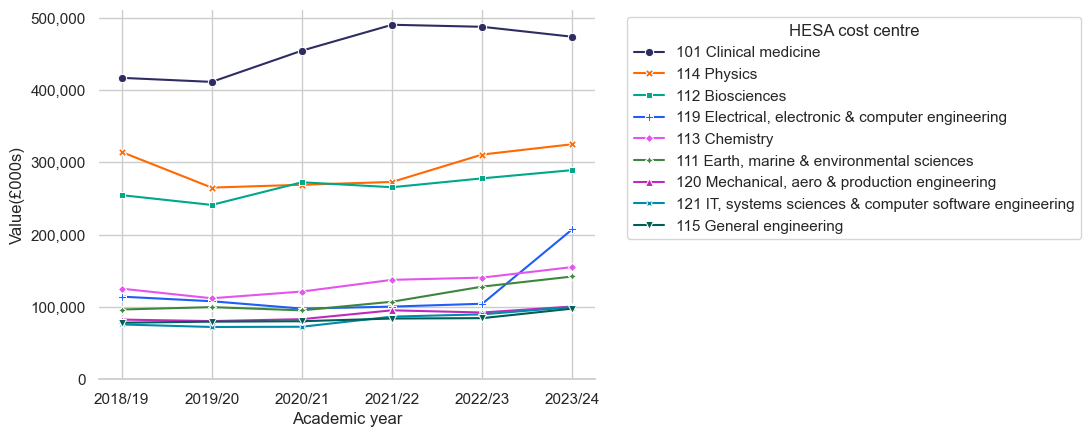

In [93]:
df_melt = df_sample.melt(id_vars=['HESA cost centre', 'Source of income'], var_name='Academic year', value_name='Value(£000s)')

sns.lineplot(data=df_melt, x='Academic year', y='Value(£000s)', hue='HESA cost centre', style='HESA cost centre', markers=True, dashes=False)

plt.legend(title='HESA cost centre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(bottom=0)


In [94]:

# Remove leading digits and any whitespace after them
data_pivot['HESA cost centre'] = data_pivot['HESA cost centre'].str.replace(r'^\d+\s*', '', regex=True)

data_pivot.to_csv('HESA_cost_centre_income.csv', index=False)


In [95]:
# Split into UKRI Research Councils, and Other funding bodies

my_dict = {
    "10 EU industry, commerce and public corporations":"Other",
    "11 EU (excluding UK) other":"Other",
    "12 Non-EU-based charities (open competitive process)":"Other",
    "13 Non-EU industry, commerce and public corporations":"Other",
    "14 Non-EU other":"Other",
    "15 Total":"Total",
    "1a Biotechnology and Biological Sciences Research Council (BBSRC)":"UKRI",
    "1b Medical Research Council (MRC)":"UKRI",
    "1c Natural Environment Research Council (NERC)":"UKRI",
    "1d Engineering and Physical Sciences Research Council (EPSRC)":"UKRI",
    "1e Economic and Social Research Council (ESRC)":"UKRI",
    "1f Arts & Humanities Research Council (AHRC)":"UKRI",
    "1g Science & Technology Facilities Council (STFC)":"UKRI",
    "1h UK Research and Innovation":"UKRI",
    "1i Other":"Other",
    "1h Other":"Other",
    "1j Total Research Councils":"Total Research Councils",
    "1i Total Research Councils":"Total Research Councils",
    "2 UK-based charities (open competitive process)":"Other",
    "3 UK based charities (other)":"Other",
    "4 UK central government bodies/local authorities, health and hospital authorities":"Other",
    "5 UK central government tax credits for research and development expenditure":"Other",
    "6 UK industry, commerce and public corporations":"Other",
    "7 UK other sources":"Other",
    "8 EU government bodies":"Other",
    "9 EU-based charities (open competitive process)":"Other"
}

In [96]:
data_pivot['Source of income group'] = data_pivot['Source of income'].apply(lambda x: my_dict.get(x, x))

In [97]:
data_group = data_pivot.groupby(['HESA cost centre', 'Source of income group'], as_index=False).sum(numeric_only=True)

In [98]:
data_group.loc[data_group['Source of income group'] != 'Total Research Councils'].to_csv('HESA_cost_centre_income_grouped.csv', index=False)

In [99]:
data_pivot['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [100]:
data_group[(data_group['Source of income group'] == 'UKRI') & data_group['HESA cost centre'].isin(['Biosciences', 'Chemistry', 'Physics', 'Area studies', 'Modern languages'])]

#data_group['HESA cost centre'].unique()

Academic year,HESA cost centre,Source of income group,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24
23,Area studies,UKRI,1712.0,1373.0,1081.0,766.0,1157.0,712.0
31,Biosciences,UKRI,241625.0,229380.0,258084.0,248559.0,260661.0,271168.0
47,Chemistry,UKRI,114566.0,101949.0,107028.0,121011.0,124894.0,138522.0
131,Modern languages,UKRI,11253.0,10131.0,8054.0,10314.0,12916.0,12436.0
151,Physics,UKRI,295913.0,245473.0,246824.0,248386.0,285668.0,298250.0


In [101]:
data_group['HESA cost centre'].unique()

data_percentage = data_group.copy()[~data_group['HESA cost centre'].str.contains('Total') & ~data_group['Source of income group'].str.contains('Total')]

data_percentage[data_percentage.columns[2:]] = data_percentage.groupby('HESA cost centre')[data_percentage.columns[2:]].transform(lambda x: x / x.sum() * 100)

data_percentage.to_clipboard(index=False)

In [102]:

data_percentage = data_group.copy()[~data_group['HESA cost centre'].str.contains('Total') & ~data_group['Source of income group'].str.contains('Total')]

data_percentage[data_percentage.columns[2:]] = data_percentage.groupby('Source of income group')[data_percentage.columns[2:]].transform(lambda x: x / x.sum() * 100)

data_percentage['HESA cost centre'] = data_percentage['HESA cost centre'].str[4:]

# Remove leading digits and any whitespace after them
data_percentage['HESA cost centre'] = data_percentage['HESA cost centre'].str.replace(r'^\d+\s*', '', regex=True)


data_percentage.to_clipboard(index=False)



In [103]:
data_plot = data_group[data_group['Source of income group'] == 'UKRI'].sort_values(by='2023/24', ascending=False).head(11).iloc[1:]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2018-19'),
  Text(1, 0, '2019-20'),
  Text(2, 0, '2020-21'),
  Text(3, 0, '2021-22'),
  Text(4, 0, '2022-23'),
  Text(5, 0, '2023-24')])

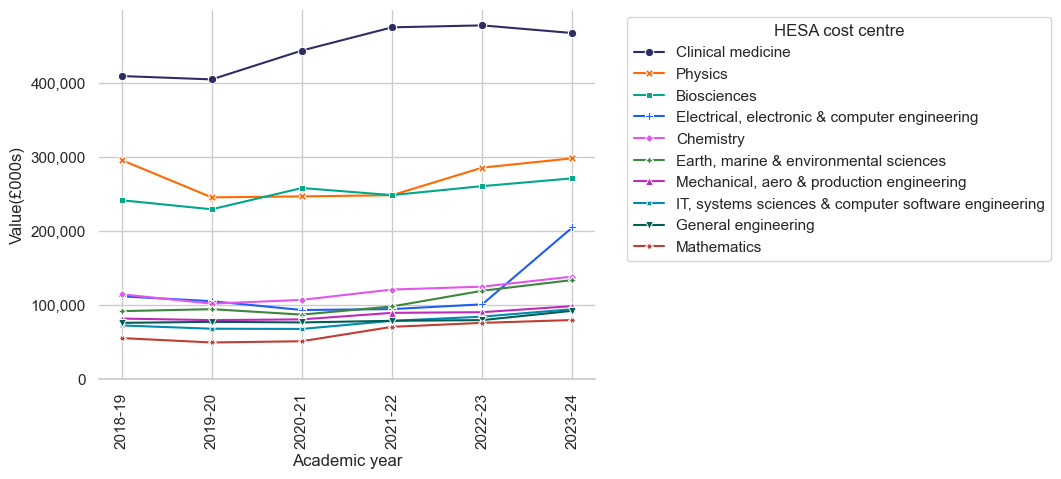

In [104]:
df_melt = data_plot.melt(id_vars=['HESA cost centre', 'Source of income group'], var_name='Academic year', value_name='Value(£000s)')
df_melt['Academic year'] = df_melt['Academic year'].str.replace('/', '-')

sns.lineplot(data=df_melt, x='Academic year', y='Value(£000s)', hue='HESA cost centre', style='HESA cost centre', markers=True, dashes=False)

plt.legend(title='HESA cost centre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylim(bottom=0)

plt.xticks(rotation=90)


In [105]:
# How does Physics compare?

data_physics = data_pivot[data_pivot['HESA cost centre'] == 'Physics']

data_physics['Source of income'].unique()

array(['10 EU industry, commerce and public corporations',
       '11 EU (excluding UK) other',
       '12 Non-EU-based charities (open competitive process)',
       '13 Non-EU industry, commerce and public corporations',
       '14 Non-EU other', '15 Total',
       '1a Biotechnology and Biological Sciences Research Council (BBSRC)',
       '1b Medical Research Council (MRC)',
       '1c Natural Environment Research Council (NERC)',
       '1d Engineering and Physical Sciences Research Council (EPSRC)',
       '1e Economic and Social Research Council (ESRC)',
       '1f Arts & Humanities Research Council (AHRC)',
       '1g Science & Technology Facilities Council (STFC)',
       '1h UK Research and Innovation', '1i Other',
       '1j Total Research Councils',
       '2 UK-based charities (open competitive process)',
       '3 UK based charities (other)',
       '4 UK central government bodies/local authorities, health and hospital authorities',
       '5 UK central government tax credi

In [106]:
data_pivot['HESA cost centre'].unique()

cost_centres = ['Chemistry', 'Physics', 'Mathematics', 'General Engineering', 'Total academic departments']